# **PART B:- Implement K-Mediod Algorithm on a credit card dataset. Determine the number of clusters using the Silhouette Method.**



Importing necessary libraries

In [3]:
!pip install scikit-learn-extra


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('dataset/Credit_Card.csv')

In [6]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Drop non-numerical columns like 'CUST_ID'

In [7]:
data = data.drop('CUST_ID', axis=1)

In [8]:
data.isnull()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Filling null values

In [10]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_3852\4250023876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)


In [11]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_3852\4267824778.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)


In [12]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
assert data.isnull().sum().sum() == 0, "There are still missing values in the data"

Normalizing the data

In [14]:
scaler = StandardScaler()

In [15]:
scaled_data = scaler.fit_transform(data)

Initialize variables for silhouette scores

In [16]:
silhouette_scores = []

In [17]:
# Loop through different values of k (number of clusters)
for n_clusters in range(2, 15):  # Trying clusters from 2 to 14
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmedoids.fit_predict(scaled_data)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 2, the average silhouette score is: 0.1945165537378692
For n_clusters = 3, the average silhouette score is: 0.16024040458444103
For n_clusters = 4, the average silhouette score is: 0.13738603460433335
For n_clusters = 5, the average silhouette score is: 0.14859330798827058
For n_clusters = 6, the average silhouette score is: 0.07497117420304265
For n_clusters = 7, the average silhouette score is: 0.051193591100429474
For n_clusters = 8, the average silhouette score is: 0.03912406632314492
For n_clusters = 9, the average silhouette score is: 0.08491760468793152
For n_clusters = 10, the average silhouette score is: 0.03469231089500277
For n_clusters = 11, the average silhouette score is: 0.10280007396743242
For n_clusters = 12, the average silhouette score is: 0.12574022507559737
For n_clusters = 13, the average silhouette score is: 0.10588686039076617
For n_clusters = 14, the average silhouette score is: 0.09598194803415983


Plot silhouette scores

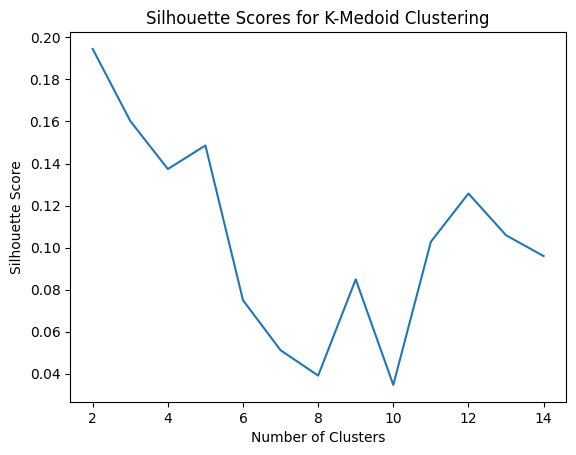

In [19]:
plt.plot(range(2, 15), silhouette_scores)
plt.title("Silhouette Scores for K-Medoid Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [20]:
optimal_clusters = range(2, 10)[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_clusters}")

The optimal number of clusters is: 2


K-medoids

In [21]:
# Define the KMedoids model with 2 clusters
kmedoids = KMedoids(n_clusters=2, random_state=42)

# Fit the model to your dataset
kmedoids.fit(scaled_data)

# Get cluster labels for each point in the dataset
cluster_labels = kmedoids.predict(scaled_data)

Silhouette Score for 2 clusters: 0.1945165537378692


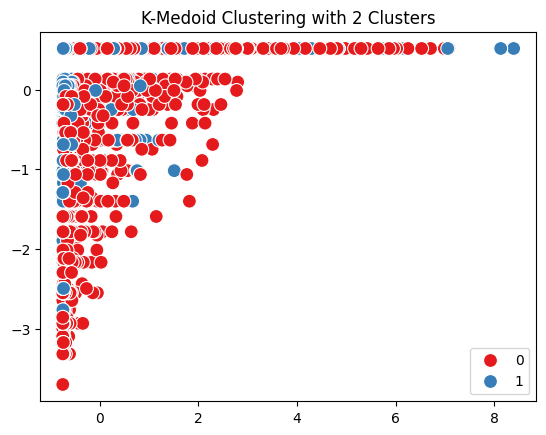

In [22]:
# Calculate silhouette score for k=2 clusters
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score for 2 clusters: {silhouette_avg}")

# Visualize the clustering result (optional, if it's a 2D or 3D dataset)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=cluster_labels, palette="Set1", s=100)
plt.title("K-Medoid Clustering with 2 Clusters")
plt.show()

Perform PCA for 2D visualization (optional, if more than 2 features)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

Visualize the clustering result

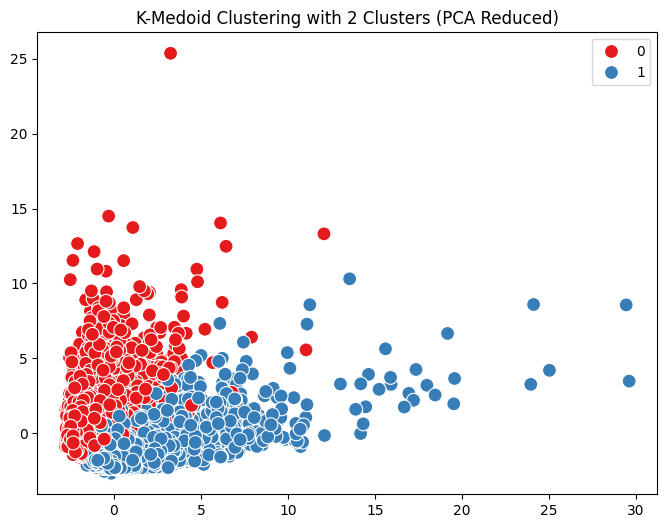

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=cluster_labels, palette="Set1", s=100)
plt.title(f"K-Medoid Clustering with {optimal_clusters} Clusters (PCA Reduced)")
plt.show()

The plot shows two clusters, each represented by different colors (red and blue). Each point on the plot represents a data instance, with its position determined by the first two principal components extracted by PCA.

**Cluster Separation:**

**Red Cluster (Cluster 0):** Points in this cluster are grouped on the left side of the plot, with some spread into the upper left area.

**Blue Cluster (Cluster 1):** Points in this cluster are more spread out and occupy the lower right side of the plot.

Visualize silhouette plots

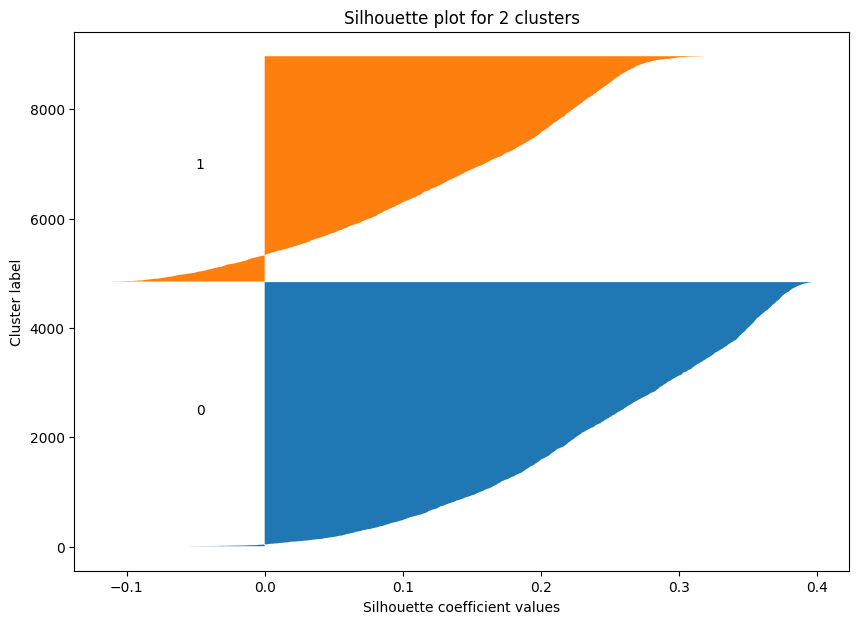

In [26]:
plt.figure(figsize=(10, 7))
sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)
y_lower = 10
for i in range(optimal_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.title(f"Silhouette plot for {optimal_clusters} clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()

**Cluster 0 (Blue Area):** The silhouette scores for this cluster range from around 0 to 0.4, suggesting that most points in this cluster are reasonably well-clustered.

There are no points with negative silhouette scores, indicating that points in this cluster generally belong to it and are not on the boundary with another cluster.



**Cluster 1 (Orange Area):**
This cluster has silhouette scores similar to Cluster 0, also ranging from around 0 to 0.4.

Like Cluster 0, Cluster 1 does not have any points with negative silhouette scores, implying a good clustering structure for this cluster as well.